# Step 1: Data Ingestion

In [1]:
import numpy as np
import pandas as pd
import os
import pathlib

# data viz
from matplotlib import pyplot as plt
import seaborn as sns           # for nicer plots
sns.set(style="darkgrid")       # default style

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTENC


In [2]:
notebook_dir = pathlib.Path(os.getcwd()) 
csvdir_path = notebook_dir.parent / "data" / "external" 
file_name = "FPA_FOD_Plus.csv"
file_path = f"{csvdir_path}/{file_name}"

In [3]:
df_init = pd.read_csv(file_path)

/var/folders/l5/nv1yy17503b71cs9y247p65w0000gn/T/ipykernel_3419/477084150.py:1: DtypeWarning: Columns (9,11,13,14,15,16,17,52,53,60,62,63,64,307) have mixed types. Specify dtype option on import or set low_memory=False.
  df_init = pd.read_csv(file_path)


In [4]:
# 1. how many columns does the dataset contain?
print(f"The number of columns in the dataset: {df_init.shape[1]}")

# 2. how many rows are there in the dataset?
print(f"The number of rows in the dataset: {df_init.shape[0]}")

The number of columns in the dataset: 308
The number of rows in the dataset: 2302521


In [5]:
# drop columns that have the number of missing values greater than 80%
cutoff_missing_values = df_init.shape[0]*0.8
missing_vals = df_init.isna().sum().sort_values(ascending=False)
cols_missing_gt80pct = list(missing_vals[missing_vals > cutoff_missing_values].index)
df = df_init.drop(columns=cols_missing_gt80pct)

### Getting to know the data

In [6]:
# 1. how many columns does the dataset contain?
print(f"The number of columns in the dataset: {df.shape[1]}")

# 2. how many rows are there in the dataset?
print(f"The number of rows in the dataset: {df.shape[0]}")

# 3. what are the column names?
print(f"Column names int the dataset: {list(df.columns)}")

The number of columns in the dataset: 286
The number of rows in the dataset: 2302521
Column names int the dataset: ['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'LatLong_State', 'LatLong_County', 'NPL', 'Mang_Type', 'Mang_Name', 'Des_Tp', 'GAP_Sts', 'GAP_Prity', 'EVH', 'EVT', 'EVH_1km', 'EVT_1km', 'EVC', 'EVC_1km', 'NAME', 'MOD_NDVI_12m', 'MOD_EVI_12m', 'Land_Cover', 'Land_Cover_1km', 'rpms', 'rpms_1km', 'Population', 'Popo_1km', 'GACCAbbrev', 'GACC_PL', 'GACC_New fire', 'GACC_New LF', 'GACC_Uncont LF', 'GACC_Type 1 

In [7]:
# check for duplicates of id vars
print(f"Number of duplicates in FOD_ID: {df.FOD_ID.duplicated().sum()}")
print(f"Number of duplicates in FPA_ID: {df.FPA_ID.duplicated().sum()}")

Number of duplicates in FOD_ID: 64
Number of duplicates in FPA_ID: 0


In [8]:
cols_show = ['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE']
df[df.FOD_ID.duplicated(keep=False)][cols_show].sort_values(by=['FOD_ID', 'FPA_ID']).head(8)

,FOD_ID,FPA_ID,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,LATITUDE,LONGITUDE
1953439,400632894,ICS209_2019_10664126,IA-ICS209,FS,OK 742,2019,2019-03-20,79,32.939277,-87.329210
2194351,400632894,IRW-2020-AKSWS-004278,IA-IRWIN,ST/C&L,ANIAK RIVER,2020,2020-06-16,168,61.406390,-159.304009
1976222,400632895,ICS209_2019_10671249,IA-ICS209,ST/C&L,BURNOUT LANE (07),2019,2019-06-29,180,30.405556,-85.615000
2190116,400632895,IRW-2020-AKSWS-004127,IA-IRWIN,ST/C&L,DECOURCY MOUNTAIN,2020,2020-05-31,152,62.108317,-158.495323
1953301,400632897,ICS209_2019_10674072,IA-ICS209,DOD,WET POND,2019,2019-03-20,79,30.490000,-86.820000
2189624,400632897,IRW-2020-AKSWS-004126,IA-IRWIN,ST/C&L,SMITH CREEK,2020,2020-05-30,151,62.115333,-158.497256
1953576,400632898,ICS209_2019_10674112,IA-ICS209,DOD,NAME,2019,2019-03-21,80,30.450000,-86.770000
2195101,400632898,IRW-2020-AKSWS-004286,IA-IRWIN,ST/C&L,BLACK RIVER,2020,2020-06-18,170,62.485001,-156.176307


Note: FOD_ID are valid duplicates. The unique identifier in this data set is FPA_ID. There are no duplicates in FPA_ID.

### Choosing the prediction task

`Consider FIRE_SIZE_CLASS`

In [9]:
df.FIRE_SIZE_CLASS.value_counts()

FIRE_SIZE_CLASS
B    1103730
A     876238
C     256879
D      34003
E      17193
F       9694
G       4784
Name: count, dtype: int64

<Axes: xlabel='FIRE_SIZE_CLASS'>

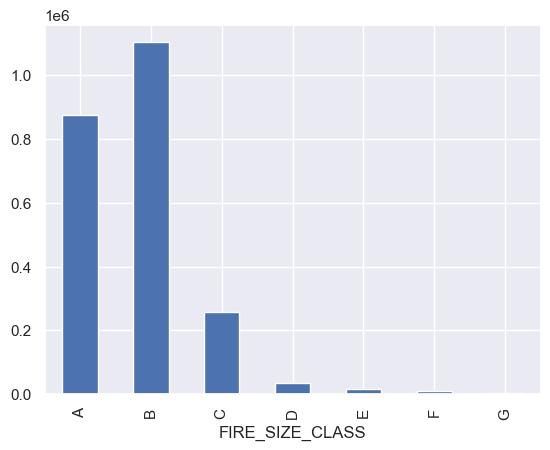

In [10]:
df.FIRE_SIZE_CLASS.value_counts().sort_index().plot.bar()

Note: class imbalance is observed

`Consider FIRE_SIZE`

In [11]:
df.FIRE_SIZE.dtypes

dtype('float64')

In [12]:
df.FIRE_SIZE.describe()

count    2.302521e+06
mean     7.817802e+01
std      2.631077e+03
min      1.000000e-05
25%      1.000000e-01
50%      8.000000e-01
75%      3.000000e+00
max      6.627000e+05
Name: FIRE_SIZE, dtype: float64

In [13]:
print(f"Fire size max: {df.FIRE_SIZE.max():.5f}")
print(f"Fire size minimum: {df.FIRE_SIZE.min():.5f}")

Fire size max: 662700.00000
Fire size minimum: 0.00001


<Axes: ylabel='Frequency'>

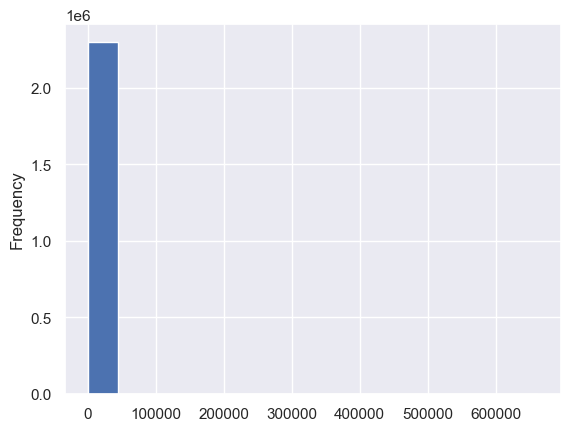

In [14]:
df.FIRE_SIZE.plot.hist(bins=15)

Note: FIRE_SIZE variable has a very skewed distribution

In [15]:
# look at FIRE_SIZE of FIRE_CLASS "G"
firecl_g = df[df.FIRE_SIZE_CLASS == 'G'].FIRE_SIZE

In [16]:
firecl_g.describe()

count      4784.000000
mean      28238.712241
std       50249.384807
min        5000.000000
25%        7198.000000
50%       12200.500000
75%       26118.925000
max      662700.000000
Name: FIRE_SIZE, dtype: float64

In [17]:
print(f"Fire size max: {df.FIRE_SIZE.max():.5f}")
print(f"Fire size minimum: {df.FIRE_SIZE.min():.5f}")

Fire size max: 662700.00000
Fire size minimum: 0.00001


<Axes: ylabel='Frequency'>

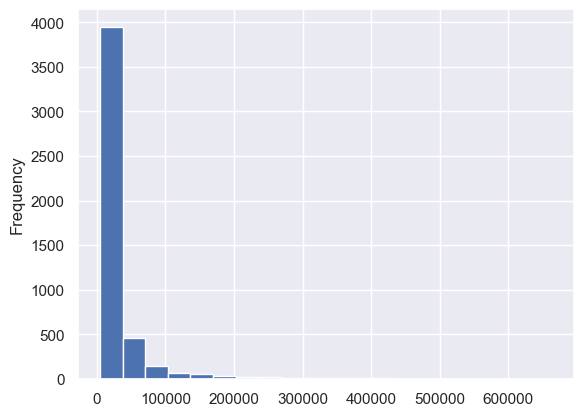

In [18]:
firecl_g.plot.hist(bins=20)

Note: Distribution of fire_size in the subset G is still skewed, but less than the skewness of fire_size distribution in the overall samples.

`Create fire_size cutoff`

In [19]:
# binning approach 1
bins_01 = [0, 999, 5000, 700000]                    # 999: max value of fire_size_class E, 5000: min value of fire_size_class G
fire_cats_01 = pd.cut(df.FIRE_SIZE, bins_01)
print(f"{fire_cats_01.value_counts()}")
print(f"\n{fire_cats_01.value_counts(normalize=True)}")

FIRE_SIZE
(0, 999]          2288042
(999, 5000]          9780
(5000, 700000]       4699
Name: count, dtype: int64

FIRE_SIZE
(0, 999]          0.993712
(999, 5000]       0.004248
(5000, 700000]    0.002041
Name: proportion, dtype: float64


In [20]:
# binning approach 2
bins_02 = [0, 4999, 700000]                     # 4999: max value of fire_size_class F
fire_cats_02 = pd.cut(df.FIRE_SIZE, bins_02)
print(f"{fire_cats_02.value_counts()}")
print(f"\n{fire_cats_02.value_counts(normalize=True)}")

FIRE_SIZE
(0, 4999]         2297737
(4999, 700000]       4784
Name: count, dtype: int64

FIRE_SIZE
(0, 4999]         0.997922
(4999, 700000]    0.002078
Name: proportion, dtype: float64


In [21]:
# binning approach 3
bins_03 = [0, 4999, 29000, 700000]       # 4999: max value of fire_size_class F, 29000: aprox. mean value of fire_size_class G
fire_cats_03 = pd.cut(df.FIRE_SIZE, bins_03)
print(f"{fire_cats_03.value_counts()}")
print(f"\n{fire_cats_03.value_counts(normalize=True)}")

FIRE_SIZE
(0, 4999]          2297737
(4999, 29000]         3682
(29000, 700000]       1102
Name: count, dtype: int64

FIRE_SIZE
(0, 4999]          0.997922
(4999, 29000]      0.001599
(29000, 700000]    0.000479
Name: proportion, dtype: float64


In [22]:
# binning approach 4 (from Nedim's code)
bins_04 = [0, 100, 4999, 29000, df.FIRE_SIZE.max()] 
fire_cats_04 = pd.cut(df.FIRE_SIZE, bins_04)
print(f"{fire_cats_04.value_counts()}")
print(f"\n{fire_cats_04.value_counts(normalize=True)}")

FIRE_SIZE
(0.0, 100.0]           2241807
(100.0, 4999.0]          55930
(4999.0, 29000.0]         3682
(29000.0, 662700.0]       1102
Name: count, dtype: int64

FIRE_SIZE
(0.0, 100.0]           0.973632
(100.0, 4999.0]        0.024291
(4999.0, 29000.0]      0.001599
(29000.0, 662700.0]    0.000479
Name: proportion, dtype: float64


`Bin using approach 4`

In [23]:
group_names = ['small', 'medium', 'large', 'very large']

df['FIRE_SIZE_LABEL'] = pd.cut(df.FIRE_SIZE, bins_04, labels=group_names)

In [24]:
df.FIRE_SIZE_LABEL.value_counts()

FIRE_SIZE_LABEL
small         2241807
medium          55930
large            3682
very large       1102
Name: count, dtype: int64

# Step 2: Data Preprocessing

## Preprocessing: Part 1

`Recode target variable`

In [25]:
# recode fire_size_label  from string to numeric

firelabel_mapping = {
    'small': 0,
    'medium': 1,
    'large': 2,
    'very large': 3
}
print(f"{firelabel_mapping=}")

df['FIRE_SIZE_LABEL'] = df['FIRE_SIZE_LABEL'].map(firelabel_mapping)

firelabel_mapping={'small': 0, 'medium': 1, 'large': 2, 'very large': 3}


`Shuffle the dataset`

In [26]:
np.random.seed(207)

indices = list(range(df.shape[0]))               # create a list of indices corresponding to rows in the dataset
shuffled_indices = np.random.permutation(indices)
df = df.reindex(index=shuffled_indices)     # change the ordering of the df


`Create training, validation, and test datasets`

Using a 60/20/20 split

Approach: stratified random sampling, strata = FIRE_YEAR and FIRE_SIZE_LABEL

In [27]:
val_size = 0.2/(0.2 + 0.6)
df_train_main, df_test = train_test_split(df, test_size= 0.2, random_state=207,
                                           stratify=list(zip(df['FIRE_YEAR'], df['FIRE_SIZE_LABEL'])))
df_train, df_val = train_test_split(df_train_main, test_size=val_size, random_state=207,
                                     stratify=list(zip(df_train_main['FIRE_YEAR'], df_train_main['FIRE_SIZE_LABEL'])))

# print shapes
print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")
print(f"Shape of df_test: {df_test.shape}")

Shape of df_train: (1381512, 287)
Shape of df_val: (460504, 287)
Shape of df_test: (460505, 287)


`Identify features of interest`

In [28]:
# from FPA FOD data
# trgt_feat_fod = ['FIRE_SIZE_LABEL', 'FIRE_YEAR', 'DISCOVERY_DOY', 'NWCG_CAUSE_CLASSIFICATION', 'LATITUDE', 'LONGITUDE']
trgt_feat_fod = ['FIRE_SIZE_LABEL', 'FIRE_YEAR', 'DISCOVERY_DOY', 'NWCG_CAUSE_CLASSIFICATION', 'LATITUDE', 'LONGITUDE', 'STATE']

# from GRIDMET: variables surround 5-day window centered on the fire discovery date
feat_gridmet = list(df_train.columns[df_train.columns.str.contains('_5D_')])

# from risk management assistance
feat_rmgmta = ['SDI']

# from fire stations
feat_firestation = ['No_FireStation_20.0km']

# from GACC
feat_gacc = ['GACC_PL']

# from global human modification
feat_ghm = ['GHM']

# from NDVI
feat_ndvi = ['NDVI-1day']      

# from national preparedness level
feat_npl = ['NPL']

# from social vulnerability index
feat_svi = ['EPL_PCI']

# from rangeland prod
feat_rangeland = ['rpms', 'rpms_1km']

In [29]:
# compile selected vars
trgt_feat_selected = trgt_feat_fod + feat_gridmet + feat_rmgmta + feat_firestation + feat_gacc + feat_ghm + feat_ndvi + feat_npl + feat_svi + feat_rangeland

In [30]:
# select only variables of interest (outcome and features)
df_train = df_train[trgt_feat_selected]
df_val = df_val[trgt_feat_selected]
df_test = df_test[trgt_feat_selected]

# print shapes
print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")
print(f"Shape of df_test: {df_test.shape}")

Shape of df_train: (1381512, 47)
Shape of df_val: (460504, 47)
Shape of df_test: (460505, 47)


`Clean features`

Handle missing values

In [31]:
# check for missing value
df_train.isna().sum().sort_values(ascending=False)

GACC_PL                      710061
EPL_PCI                       59194
NDVI-1day                     45802
pr_5D_max                     28684
th_5D_max                     28684
tmmn_5D_max                   28684
tmmx_5D_max                   28684
rmin_5D_min                   28684
rmax_5D_min                   28684
sph_5D_min                    28684
vs_5D_max                     28684
srad_5D_max                   28684
erc_5D_mean                   28684
etr_5D_max                    28684
fm100_5D_min                  28684
fm1000_5D_min                 28684
bi_5D_max                     28684
vpd_5D_max                    28684
erc_5D_max                    28684
pr_5D_min                     28684
bi_5D_mean                    28684
vpd_5D_mean                   28684
vs_5D_mean                    28684
pr_5D_mean                    28684
tmmn_5D_mean                  28684
tmmx_5D_mean                  28684
rmin_5D_mean                  28684
sph_5D_mean                 

Approach to imputing missing values: drop samples with any missing values

In [32]:
# drop samples with missing values
df_train = df_train.dropna(axis=0, how='any')
df_val = df_val.dropna(axis=0, how='any')
df_test = df_test.dropna(axis=0, how='any')

# print shapes
print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")
print(f"Shape of df_test: {df_test.shape}")

Shape of df_train: (594060, 47)
Shape of df_val: (197991, 47)
Shape of df_test: (198261, 47)


In [33]:
# sanity check for missing value 
df_train.isna().sum().sort_values(ascending=False)

FIRE_SIZE_LABEL              0
bi_5D_max                    0
rmin_5D_min                  0
rmax_5D_min                  0
sph_5D_min                   0
vs_5D_max                    0
th_5D_max                    0
srad_5D_max                  0
etr_5D_max                   0
fm100_5D_min                 0
fm1000_5D_min                0
vpd_5D_max                   0
tmmn_5D_max                  0
erc_5D_max                   0
SDI                          0
No_FireStation_20.0km        0
GACC_PL                      0
GHM                          0
NDVI-1day                    0
NPL                          0
EPL_PCI                      0
rpms                         0
tmmx_5D_max                  0
pr_5D_max                    0
FIRE_YEAR                    0
rmax_5D_mean                 0
DISCOVERY_DOY                0
NWCG_CAUSE_CLASSIFICATION    0
LATITUDE                     0
LONGITUDE                    0
STATE                        0
pr_5D_mean                   0
tmmn_5D_

Clean NWCG_CAUSE_CLASSIFICATION variable

In [34]:
nwcg_cause_simplified = {
    'Human' : 'hum',
    'Natural' : 'nat',
    'Missing data/not specified/undetermined' : 'miss-unspec'
    
}

for data in [df_train, df_val, df_test]:
    data['NWCG_CAUSE_CLASSIFICATION'] = data['NWCG_CAUSE_CLASSIFICATION'].map(nwcg_cause_simplified)

In [35]:
df_train['NWCG_CAUSE_CLASSIFICATION'].value_counts(dropna=False) # sanity check

NWCG_CAUSE_CLASSIFICATION
hum            472914
nat             70170
miss-unspec     50976
Name: count, dtype: int64

`Address Class Imbalance`

In [36]:
# define outcome
Y_train_tmp = df_train['FIRE_SIZE_LABEL']

# define features
features = list(df_train.columns)
features.remove('FIRE_SIZE_LABEL')
X_train_tmp = df_train[features]

# categorical features
cat_features = ['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']

In [37]:
print(f"Original class distribution, training data:\n{Y_train_tmp.value_counts()}")

Original class distribution, training data:
FIRE_SIZE_LABEL
0    578696
1     14278
2       854
3       232
Name: count, dtype: int64


In [38]:
# apply SMOTENC to the training data
smote_nc = SMOTENC(categorical_features=cat_features, random_state=207)
X_train_resampled, Y_train_resampled = smote_nc.fit_resample(X_train_tmp, Y_train_tmp)

print(f"Class distribution after SMOTENC, training data:\n{Y_train_resampled.value_counts()}")

Class distribution after SMOTENC, training data:
FIRE_SIZE_LABEL
0    578696
1    578696
2    578696
3    578696
Name: count, dtype: int64


In [39]:
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of Y_train_resampled: {Y_train_resampled.shape}")

Shape of X_train_resampled: (2314784, 46)
Shape of Y_train_resampled: (2314784,)


In [40]:
# reassemble training dataset
df_train_resampled_init = pd.concat([Y_train_resampled, X_train_resampled], axis=1)

print(f"Shape of df_train_resampled: {df_train_resampled_init.shape}")

Shape of df_train_resampled: (2314784, 47)


## Preprocessing: Feature extraction

Feature extraction using PCA for GRIDMET features. GRIDMET features generally highly correlate with one another. Most of correlations among non-GRIDMET features are low. Details are available in `03-eda-imputedropna-smotenc-sa.ipynb`.

In [41]:
X_train_gridmet = df_train_resampled_init[feat_gridmet]
X_val_gridmet = df_val[feat_gridmet]
X_test_gridmet = df_test[feat_gridmet]

#### Part 1: Standardize features 

In [42]:
sc_gridmet = StandardScaler()
sc_gridmet.fit(X_train_gridmet) # learn mean and variance from GRIDMET training data

print(f"Mean: {sc_gridmet.mean_} \nVariance: {sc_gridmet.var_}")

# standardized training, validation, and test GRIDMET data using mean and variance from GRIDMET training data
X_train_gridmet_std = sc_gridmet.transform(X_train_gridmet)
X_val_gridmet_std = sc_gridmet.transform(X_val_gridmet)
X_test_gridmet_std = sc_gridmet.transform(X_test_gridmet)

Mean: [8.37363168e-01 2.83734149e+02 3.00320958e+02 2.30223437e+01
 6.61886326e+01 6.41207088e-03 3.92808836e+00 1.99423694e+02
 2.62168040e+02 7.97159932e+00 9.72746105e+00 1.15837044e+01
 4.54477196e+01 1.71435651e+00 5.77802037e+01 1.00739927e-02
 3.24925071e+00 2.86682776e+02 3.03527048e+02 1.68351199e+01
 5.40012086e+01 5.12892724e-03 5.33964875e+00 2.70112702e+02
 2.81517243e+02 9.60242755e+00 8.68471302e+00 1.12628134e+01
 5.96300792e+01 2.11533947e+00 6.26737753e+01] 
Variance: [3.80182477e+00 4.35165755e+01 5.06249079e+01 1.25925727e+02
 3.35193268e+02 9.46363085e-06 1.30632827e+00 3.00148519e+03
 4.18122361e+03 6.48050730e+00 1.49009707e+01 1.86604936e+01
 3.96562763e+02 6.33957973e-01 4.66886651e+02 2.80011118e-02
 5.42264177e+01 3.48770373e+01 3.88579757e+01 9.59603823e+01
 3.71766221e+02 9.16740735e-06 2.99908583e+00 3.39578702e+03
 3.89124670e+03 7.94991988e+00 1.27674170e+01 1.78570892e+01
 4.41448549e+02 7.87853451e-01 4.51828288e+02]


In [43]:
print(f"There are {X_train_gridmet.shape[1]} GRIDMET features. So we have {X_train_gridmet.shape[1]} mean and variance values we use to standarize each feature.")

There are 31 GRIDMET features. So we have 31 mean and variance values we use to standarize each feature.


#### Part 2: Construct the covariance matrix

In [44]:
cov_matrix_gridmet = np.cov(X_train_gridmet_std.T)

print(f"Shape of GRIDMET features covariance matrix: {cov_matrix_gridmet.shape}")

Shape of GRIDMET features covariance matrix: (31, 31)


#### Part 3: Decompose the covariance matrix into eigenvectors and eigenvalues

In [45]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix_gridmet)

In [46]:
print(f"Shape of eigen_values: {eigen_values.shape}")
print(f"First five examples of eigen_values: {eigen_values[:5]}")

print(f"\nShape of eigen_vectors: {eigen_vectors.shape}")
print(f"First three rows of eigen_vectors:")
pd.DataFrame(eigen_vectors).head(3)

Shape of eigen_values: (31,)
First five examples of eigen_values: [0.00048394 0.00083537 0.00558558 0.00703823 0.00826874]

Shape of eigen_vectors: (31, 31)
First three rows of eigen_vectors:


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.019369,-0.006451,0.014589,0.005830,0.049392,0.003725,0.044816,0.012400,0.016616,0.141636,...,-0.022942,0.086819,-0.022654,0.018963,-0.115105,0.132302,-0.622158,0.189804,0.104213,-0.102942
1,0.001029,0.006135,0.201137,0.036637,0.003398,0.301062,0.059072,0.654513,-0.001062,-0.224883,...,-0.017311,-0.225103,0.236717,-0.057341,-0.008926,-0.003808,-0.002939,0.020134,0.324053,0.122195
2,-0.007011,0.009691,-0.513181,-0.002194,0.180180,-0.393399,0.067202,0.039972,-0.029761,-0.165672,...,0.012070,0.092714,-0.026207,-0.177904,-0.003808,-0.017933,0.030909,0.014328,0.269314,0.174297


#### Part 4: Rank the eigenvalues by sorting them in decreasing order

In [47]:
# compute the explained variance ratio
sum_eigen_values = sum(eigen_values)
print('Sum of eigen values: ', sum_eigen_values)

expl_var_ratio = [val/sum_eigen_values for val in sorted(eigen_values, reverse=True)]
print('\nExample of first five explained variance ratio:')
pd.DataFrame(expl_var_ratio).head(5)

Sum of eigen values:  31.000013392185636

Example of first five explained variance ratio:


,0
0,0.484739
1,0.217584
2,0.074605
3,0.052135
4,0.046608


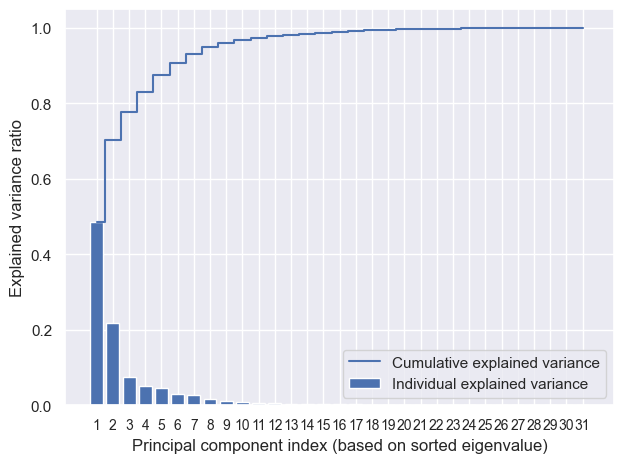

In [48]:
# visualize the explained variance ratio and the cumulative explained variance ratio
x_axis = range(1,len(eigen_values)+1)
y_axis = expl_var_ratio

# plot individual ratio
plt.bar(x_axis, y_axis, label='Individual explained variance')
# plot cumulative ratio
plt.step(x_axis, np.cumsum(y_axis), where='mid', label='Cumulative explained variance')

# legend, labels
plt.legend()
plt.xticks(x_axis, fontsize=10)
plt.ylabel('Explained variance ratio');
plt.xlabel('Principal component index (based on sorted eigenvalue)');

plt.tight_layout()
plt.show()

#### Part 5: select *k* = 2 eigen vectors (based on the *k* = 2 largest eigen values)

In [49]:
# create eigen pairs of vectors and values
eigen_pairs = [(eigen_values[i], eigen_vectors[:,i]) for i in range(len(eigen_vectors))]

# transform to df
eigen_pairs = pd.DataFrame(eigen_pairs)
eigen_pairs.rename(columns={0: 'eigen_value', 1: 'eigen_vector'}, inplace=True)
eigen_pairs.head()

,eigen_value,eigen_vector
0,0.000484,"[-0.019369454512634963, 0.001028718048956003, ..."
1,0.000835,"[-0.006451025501982839, 0.00613453550489252, 0..."
2,0.005586,"[0.014588697304559806, 0.20113678440200017, -0..."
3,0.007038,"[0.005830236321959594, 0.03663694596465967, -0..."
4,0.008269,"[0.04939188173505222, 0.003397980670232508, 0...."


In [50]:
# select the top 2 eigenvectors based on the eigenvalue
top2_eigen_vectors = eigen_pairs.nlargest(2, 'eigen_value')['eigen_vector'].values.tolist()
top2_eigen_vectors

[array([-0.10294223,  0.1221953 ,  0.17429725, -0.22466793, -0.22136745,
        -0.0457978 , -0.04316823,  0.03983521,  0.17999672,  0.22449442,
        -0.24469619, -0.24104356,  0.2099514 ,  0.22833137,  0.2465826 ,
        -0.02374679, -0.10232627,  0.11121436,  0.17273475, -0.1975463 ,
        -0.20423074, -0.03322191, -0.05959322, -0.00315652,  0.15598233,
         0.21139312, -0.24101712, -0.24108496,  0.21384253,  0.2263844 ,
         0.2458141 ]),
 array([ 0.10421276,  0.32405303,  0.26931417,  0.13177822,  0.13250499,
         0.36435561, -0.14975468, -0.12047101,  0.17811088,  0.10765839,
         0.07452869,  0.04680964, -0.13841581,  0.12988401, -0.06977733,
         0.04602537,  0.09049588,  0.31674675,  0.25323585,  0.18051993,
         0.17824123,  0.35827774, -0.16805433, -0.15512213,  0.20066523,
         0.0724591 ,  0.09194314,  0.04888852, -0.14128931,  0.11967101,
        -0.06774771])]

#### Part 6: Construct the projection matrix, **W**, using the top *k* = 2 eigen vectors

In [51]:
w = np.hstack((top2_eigen_vectors[0][:, np.newaxis],
               top2_eigen_vectors[1][:, np.newaxis],
              ))
print('\nSize of Matrix W: ', w.shape)
print('Matrix W:\n', w)



Size of Matrix W:  (31, 2)
Matrix W:
 [[-0.10294223  0.10421276]
 [ 0.1221953   0.32405303]
 [ 0.17429725  0.26931417]
 [-0.22466793  0.13177822]
 [-0.22136745  0.13250499]
 [-0.0457978   0.36435561]
 [-0.04316823 -0.14975468]
 [ 0.03983521 -0.12047101]
 [ 0.17999672  0.17811088]
 [ 0.22449442  0.10765839]
 [-0.24469619  0.07452869]
 [-0.24104356  0.04680964]
 [ 0.2099514  -0.13841581]
 [ 0.22833137  0.12988401]
 [ 0.2465826  -0.06977733]
 [-0.02374679  0.04602537]
 [-0.10232627  0.09049588]
 [ 0.11121436  0.31674675]
 [ 0.17273475  0.25323585]
 [-0.1975463   0.18051993]
 [-0.20423074  0.17824123]
 [-0.03322191  0.35827774]
 [-0.05959322 -0.16805433]
 [-0.00315652 -0.15512213]
 [ 0.15598233  0.20066523]
 [ 0.21139312  0.0724591 ]
 [-0.24101712  0.09194314]
 [-0.24108496  0.04888852]
 [ 0.21384253 -0.14128931]
 [ 0.2263844   0.11967101]
 [ 0.2458141  -0.06774771]]


#### Part 7: Transform the original input dataset using the projection matrix, **W**

In [52]:
# GRIDMET training data
X_train_gridmet_pca = X_train_gridmet_std.dot(w)
pd.DataFrame(X_train_gridmet_pca).head()

,0,1
0,-1.735439,-0.735489
1,1.648392,-1.180097
2,-6.925635,-0.656473
3,-3.501609,-2.180238
4,-4.571679,-2.811049


In [53]:
# GRIDMET validation and test data
X_val_gridmet_pca = X_val_gridmet_std.dot(w)
X_test_gridmet_pca = X_test_gridmet_std.dot(w)

`visualize the new PCA 2-D in the wildfire train dataset`

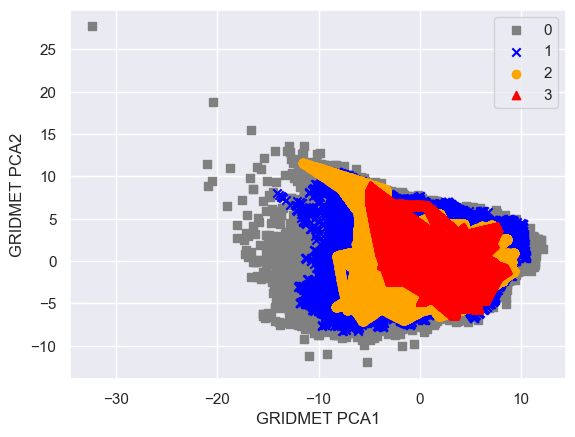

In [54]:
# define outcome
Y_train_resampled_init = df_train_resampled_init['FIRE_SIZE_LABEL']

# define colors and markers
colors = ['grey', 'blue', 'orange', 'red']
markers = ['s', 'x', 'o', '^']

# plot
for class_value, color, marker in zip(np.unique(Y_train_resampled_init), colors, markers):
    plt.scatter(X_train_gridmet_pca[Y_train_resampled_init==class_value, 0],
                X_train_gridmet_pca[Y_train_resampled_init==class_value, 1],
                color = color, label = class_value, marker=marker)

# legend, axes
plt.legend(loc='best')
plt.xlabel('GRIDMET PCA1')
plt.ylabel('GRIDMET PCA2');

Note: In some areas PCA1 and PCA2 are capable of distinguishing labels of the target variable, but in other areas the first and second PCAs poorly differentiate labels of the target variable. There is an outlier, with verly low PCA1 and high PCA2, in target variable of label=0.

#### Implement PCA using scikit, adjust *k*

In [55]:
# create an instance of the PCA class
# set k = 4 so that explained variance is at least 80% (as shown in the plot of explained variance earlier)
pca = PCA(n_components=4)

# fit the data using the X_train_gridmet_std data; tranform X_train_gridmet_std data
X_train_gridmet_pca_skl = pca.fit_transform(X_train_gridmet_std)

# transform the standardized GRIDMET validation and test data
X_val_gridmet_pca_skl = pca.transform(X_val_gridmet_std)
X_test_gridmet_pca_skl = pca.transform(X_test_gridmet_std)

In [56]:
pca_col_names = [f"GRIDMET_PCA{i}" for i in range(1,X_train_gridmet_pca_skl.shape[1]+1)]

X_train_gridmet_pca_skl = pd.DataFrame(X_train_gridmet_pca_skl, columns=pca_col_names)
X_val_gridmet_pca_skl = pd.DataFrame(X_val_gridmet_pca_skl, columns=pca_col_names)
X_test_gridmet_pca_skl = pd.DataFrame(X_test_gridmet_pca_skl, columns=pca_col_names)

print(f"Shape of X_train_gridmet_pca_skl: {X_train_gridmet_pca_skl.shape}")
print(f"Shape of X_val_gridmet_pca_skl: {X_val_gridmet_pca_skl.shape}")
print(f"Shape of X_test_gridmet_pca_skl: {X_test_gridmet_pca_skl.shape}")

Shape of X_train_gridmet_pca_skl: (2314784, 4)
Shape of X_val_gridmet_pca_skl: (197991, 4)
Shape of X_test_gridmet_pca_skl: (198261, 4)


In [57]:
print('X_train_gridmet_pca (k=4):\n')
X_train_gridmet_pca_skl.head()

X_train_gridmet_pca (k=4):



,GRIDMET_PCA1,GRIDMET_PCA2,GRIDMET_PCA3,GRIDMET_PCA4
0,-1.735439,-0.735489,-0.072299,0.026150
1,1.648392,-1.180097,-0.900638,-0.153464
2,-6.925635,-0.656473,-0.718221,-1.459048
3,-3.501609,-2.180238,0.816384,-0.671357
4,-4.571679,-2.811049,-0.039221,0.242857


#### Replace GRIDMET features with their *k* principal components

In [58]:
# drop GRIDMET features
df_train_resampled_init_tmp = df_train_resampled_init.drop(columns=feat_gridmet)
df_val_tmp = df_val.drop(columns=feat_gridmet)
df_test_tmp = df_test.drop(columns=feat_gridmet)

In [59]:
print(f"Shape of df_train_resampled_init_tmp: {df_train_resampled_init_tmp.shape}")
print(f"Shape of df_val_tmp: {df_val_tmp.shape}")
print(f"Shape of df_test_tmp: {df_test_tmp.shape}")

# add GRIDMET pca
df_train_resampled_init_pca = pd.concat([df_train_resampled_init_tmp.reset_index(drop=True), X_train_gridmet_pca_skl], axis=1)
df_val_pca = pd.concat([df_val_tmp.reset_index(drop=True), X_val_gridmet_pca_skl], axis=1)
df_test_pca = pd.concat([df_test_tmp.reset_index(drop=True), X_test_gridmet_pca_skl], axis=1)

print(f"\nShape of df_train_resampled_init_pca: {df_train_resampled_init_pca.shape}")
print(f"Shape of df_val_pca: {df_val_pca.shape}")
print(f"Shape of df_test_pca: {df_test_pca.shape}")

Shape of df_train_resampled_init_tmp: (2314784, 16)
Shape of df_val_tmp: (197991, 16)
Shape of df_test_tmp: (198261, 16)

Shape of df_train_resampled_init_pca: (2314784, 20)
Shape of df_val_pca: (197991, 20)
Shape of df_test_pca: (198261, 20)


## Preprocessing: Part 2

`Add features`

One-hot-encoding

In [60]:
cols_onehot = ['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']
# df_train_resampled = pd.get_dummies(df_train_resampled_init, columns=cols_onehot)
# df_val = pd.get_dummies(df_val, columns=cols_onehot)
# df_test = pd.get_dummies(df_test, columns=cols_onehot)

df_train_resampled_pca = pd.get_dummies(df_train_resampled_init_pca, columns=cols_onehot)
df_val_pca = pd.get_dummies(df_val_pca, columns=cols_onehot)
df_test_pca = pd.get_dummies(df_test_pca, columns=cols_onehot)

`Define outcome and features`

In [61]:
# define outcome
# Y_train_resampled = df_train_resampled_pca['FIRE_SIZE_LABEL']
# Y_val = df_val['FIRE_SIZE_LABEL']
# Y_test = df_test['FIRE_SIZE_LABEL']

Y_train_resampled_pca = df_train_resampled_pca['FIRE_SIZE_LABEL']
Y_val_pca = df_val_pca['FIRE_SIZE_LABEL']
Y_test_pca = df_test_pca['FIRE_SIZE_LABEL']

print(f"Shape of Y_train: {Y_train_resampled_pca.shape}")
print(f"Shape of Y_val: {Y_val_pca.shape}")
print(f"Shape of Y_test: {Y_test_pca.shape}")

Shape of Y_train: (2314784,)
Shape of Y_val: (197991,)
Shape of Y_test: (198261,)


In [62]:
# define features
features = list(df_train_resampled_pca.columns)
print(f"Number of items in features before removing outcome: {len(features)}")
features.remove('FIRE_SIZE_LABEL')
print(f"Number of items in features before removing outcome: {len(features)}")
print(f"{features=}")

X_train_resampled_pca = df_train_resampled_pca[features]
X_val_pca = df_val_pca[features]
X_test_pca = df_test_pca[features]

print(f"\nShape of X_train_resampled_pca: {X_train_resampled_pca.shape}")
print(f"Shape of X_val_pca: {X_val_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

Number of items in features before removing outcome: 74
Number of items in features before removing outcome: 73
features=['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'SDI', 'No_FireStation_20.0km', 'GHM', 'NDVI-1day', 'NPL', 'EPL_PCI', 'rpms', 'rpms_1km', 'GRIDMET_PCA1', 'GRIDMET_PCA2', 'GRIDMET_PCA3', 'GRIDMET_PCA4', 'NWCG_CAUSE_CLASSIFICATION_hum', 'NWCG_CAUSE_CLASSIFICATION_miss-unspec', 'NWCG_CAUSE_CLASSIFICATION_nat', 'GACC_PL_1.0', 'GACC_PL_2.0', 'GACC_PL_3.0', 'GACC_PL_4.0', 'GACC_PL_5.0', 'STATE_AL', 'STATE_AR', 'STATE_AZ', 'STATE_CA', 'STATE_CO', 'STATE_CT', 'STATE_DC', 'STATE_DE', 'STATE_FL', 'STATE_GA', 'STATE_IA', 'STATE_ID', 'STATE_IL', 'STATE_IN', 'STATE_KS', 'STATE_KY', 'STATE_LA', 'STATE_MA', 'STATE_MD', 'STATE_ME', 'STATE_MI', 'STATE_MN', 'STATE_MO', 'STATE_MS', 'STATE_MT', 'STATE_NC', 'STATE_ND', 'STATE_NE', 'STATE_NH', 'STATE_NJ', 'STATE_NM', 'STATE_NV', 'STATE_NY', 'STATE_OH', 'STATE_OK', 'STATE_OR', 'STATE_PA', 'STATE_RI', 'STATE_SC', 'STATE_SD', 'STATE_

`Standardized features`

In [63]:
# exclude one-hot-encoded vars from later standardization
cols_ncwg = list(X_train_resampled_pca.columns[X_train_resampled_pca.columns.str.contains('NWCG_CAUSE_CLASSIFICATION')])
cols_gacc = list(X_train_resampled_pca.columns[X_train_resampled_pca.columns.str.contains('GACC_PL')])
cols_state = list(X_train_resampled_pca.columns[X_train_resampled_pca.columns.str.contains('STATE')])
# cols_onehot = cols_ncwg + cols_gacc
cols_onehot = cols_ncwg + cols_gacc + cols_state
cols_continuous = [item for item in list(X_train_resampled_pca.columns) if item not in cols_onehot]

X_train_res_continuous_pca = X_train_resampled_pca[cols_continuous]
X_train_res_onehot_pca = X_train_resampled_pca[cols_onehot]
X_val_continuous_pca = X_val_pca[cols_continuous]
X_val_onehot_pca = X_val_pca[cols_onehot]
X_test_continuous_pca = X_test_pca[cols_continuous]
X_test_onehot_pca = X_test_pca[cols_onehot]

# standardized continuous features
sc_x = StandardScaler()

X_train_res_cont_std_pca = sc_x.fit(X_train_res_continuous_pca).transform(X_train_res_continuous_pca)
X_val_cont_std_pca = sc_x.fit(X_train_res_continuous_pca).transform(X_val_continuous_pca)
X_test_cont_std_pca = sc_x.fit(X_train_res_continuous_pca).transform(X_test_continuous_pca)

# add one-hot-encoded vars back 
X_train_res_std_pca = np.concatenate((X_train_res_cont_std_pca, X_train_res_onehot_pca), axis= 1)
X_val_std_pca = np.concatenate((X_val_cont_std_pca, X_val_onehot_pca), axis= 1)
X_test_std_pca = np.concatenate((X_test_cont_std_pca, X_test_onehot_pca), axis= 1)
